Вариант 1 - Балашов КМБО-03-20

Набор данных - https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists?select=aug_test.csv 

Тип классификатора - DecisionTreeClassifier(решающее дерево) 

Классификация по стобцу - Education level (Graduate – класс 0, остальные уровни – класс 1)

#Устанавливаем необходимые библиотеки:

In [1]:
import pandas
import numpy 
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

#Обработаем набор данных и подготовим его к решению задачи классификации:

In [2]:
data = pandas.read_csv('aug_test.csv', index_col='city')
#исключим столбец с уникальными значениями:
data = data[data.columns.drop(['enrollee_id'])]
data.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
city,,,,,,,,,,,
city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2129 entries, city_41 to city_102
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  2129 non-null   float64
 1   gender                  1621 non-null   object 
 2   relevent_experience     2129 non-null   object 
 3   enrolled_university     2098 non-null   object 
 4   education_level         2077 non-null   object 
 5   major_discipline        1817 non-null   object 
 6   experience              2124 non-null   object 
 7   company_size            1507 non-null   object 
 8   company_type            1495 non-null   object 
 9   last_new_job            2089 non-null   object 
 10  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 199.6+ KB


In [4]:
data['gender'] = numpy.where(data['gender'] == 'Male', 1, 0)
data['education_level'] = numpy.where(data['education_level'] == 'Graduate', 0, 1)
data['relevent_experience'] = numpy.where(data['relevent_experience'] == 'No relevent experience',0,1)

#Преобразуем текстовые данные в числовые:

In [5]:
array = ['enrolled_university', 'last_new_job', 'major_discipline', 'company_type', 'company_size', 'experience']
for column in array:
    Set = set(data[column])
    i = 0
    for item in Set:
        data[column] = data[column].replace(item, i)
        i = i + 1
        
    
data.loc[data.experience == 'NaN' , 'experience'] = 0
data.loc[data.last_new_job == 'never' , 'last_new_job'] = 0
data.loc[data.last_new_job == 'NaN' , 'major_discipline'] = 0
data.loc[data.last_new_job == 'NaN' , 'company_size'] = 0


C:\Users\dimab\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [6]:
data

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
city,,,,,,,,,,,
city_41,0.827,1,1,2,0,2,18,1,0,4,21
city_103,0.920,0,1,1,0,2,11,0,2,4,98
city_21,0.624,1,0,1,1,0,3,0,2,2,15
city_13,0.827,1,1,1,1,2,5,7,2,4,39
city_103,0.920,1,1,1,0,2,9,8,2,6,72
...,...,...,...,...,...,...,...,...,...,...,...
city_103,0.920,1,0,1,0,3,6,0,5,0,15
city_136,0.897,1,1,1,1,2,8,0,0,3,30
city_100,0.887,1,0,1,1,0,14,0,2,2,18


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2129 entries, city_41 to city_102
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  2129 non-null   float64
 1   gender                  2129 non-null   int32  
 2   relevent_experience     2129 non-null   int32  
 3   enrolled_university     2129 non-null   int64  
 4   education_level         2129 non-null   int32  
 5   major_discipline        2129 non-null   int64  
 6   experience              2129 non-null   int64  
 7   company_size            2129 non-null   int64  
 8   company_type            2129 non-null   int64  
 9   last_new_job            2129 non-null   int64  
 10  training_hours          2129 non-null   int64  
dtypes: float64(1), int32(3), int64(7)
memory usage: 174.6+ KB


#Выделим целевой признак(education_level) и удалим его из данных, на основе которых
будет обучаться классификатор:

In [8]:
Data2 = data.education_level
train = data.drop('education_level', axis = 1)

In [9]:
train.info()
data.columns

<class 'pandas.core.frame.DataFrame'>
Index: 2129 entries, city_41 to city_102
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  2129 non-null   float64
 1   gender                  2129 non-null   int32  
 2   relevent_experience     2129 non-null   int32  
 3   enrolled_university     2129 non-null   int64  
 4   major_discipline        2129 non-null   int64  
 5   experience              2129 non-null   int64  
 6   company_size            2129 non-null   int64  
 7   company_type            2129 non-null   int64  
 8   last_new_job            2129 non-null   int64  
 9   training_hours          2129 non-null   int64  
dtypes: float64(1), int32(2), int64(7)
memory usage: 166.3+ KB


Index(['city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours'],
      dtype='object')

#Разделяем данные на обучающую и тестовую выборку

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(train,Data2, test_size = 0.3, random_state = 42)
train.shape


(2129, 10)

#Построем классификатор типа - "Решающее дерево" для задачи классификации по параметру(education_level)

In [11]:
Tree = DecisionTreeClassifier(random_state=42, max_depth = 4)
Tree = Tree.fit(X_train, Y_train)
Tree

DecisionTreeClassifier(max_depth=4, random_state=42)

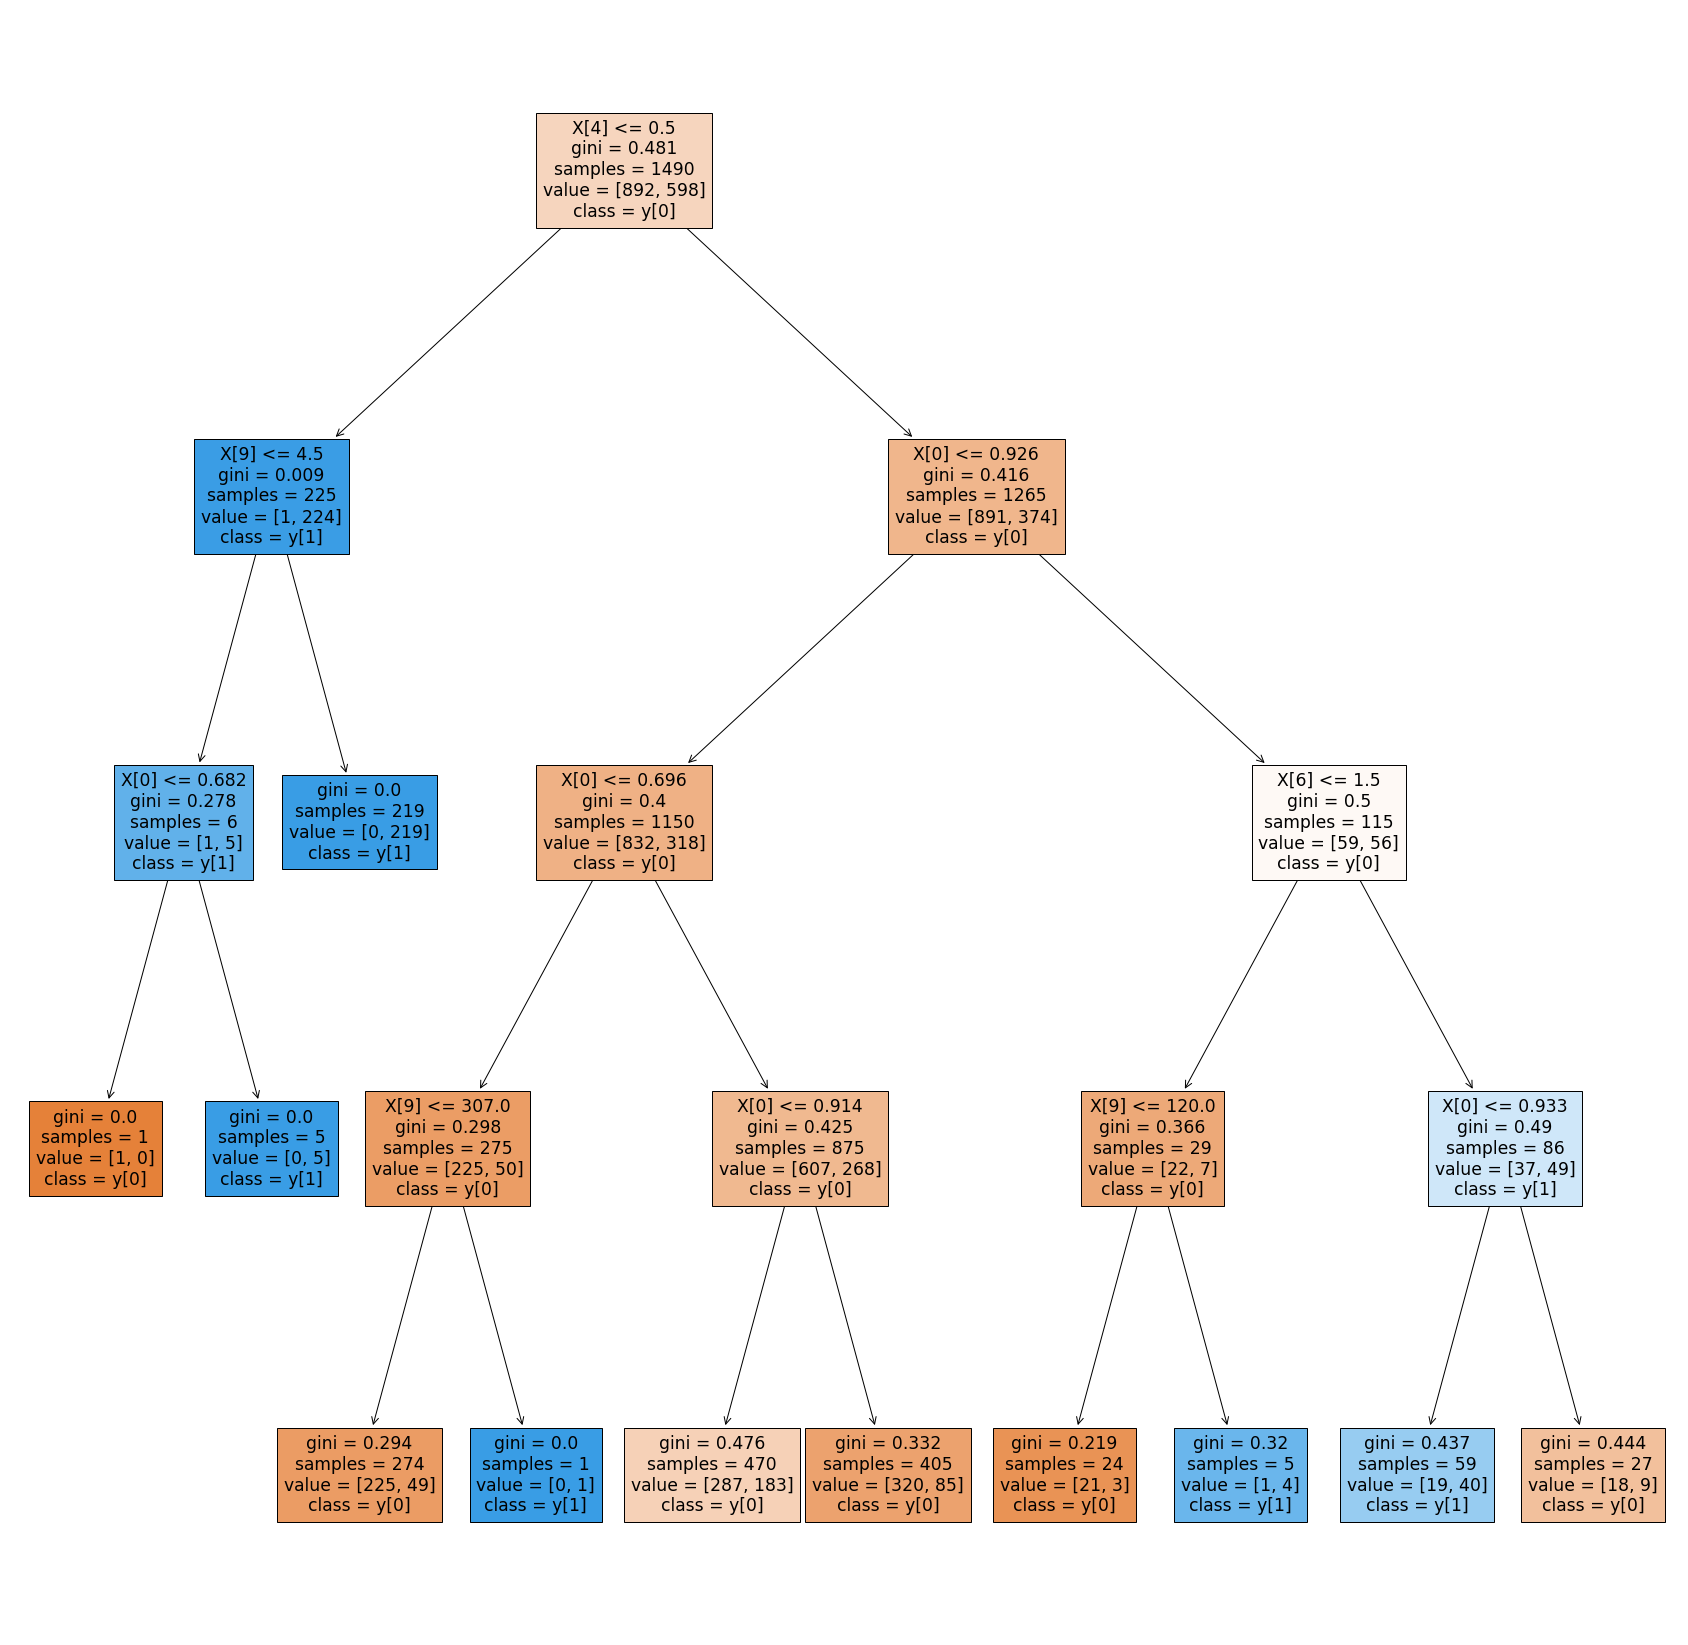

In [12]:
fig = plt.figure(figsize=(30,30))
_ = plot_tree(Tree, filled=True, class_names=True)

#Оценим точность построенного классификатора с помощью метрик precision, recall и F1

In [13]:
print("f1:"+str(numpy.average(cross_val_score(Tree, X_train, Y_train, scoring='f1'))))
print("precision:"+str(numpy.average(cross_val_score(Tree, X_train, Y_train, scoring='precision'))))
print("recall:"+str(numpy.average(cross_val_score(Tree, X_train, Y_train, scoring='recall'))))

f1:0.5689216561022254
precision:0.8943835249717603
recall:0.4180812324929972


In [14]:
print("f1:"+str(numpy.average(cross_val_score(Tree, X_test, Y_test, scoring='f1'))))
print("precision:"+str(numpy.average(cross_val_score(Tree, X_test, Y_test, scoring='precision'))))
print("recall:"+str(numpy.average(cross_val_score(Tree, X_test, Y_test, scoring='recall'))))

f1:0.5023066290985043
precision:0.805863474405674
recall:0.3702467343976778


#Попробуем улучшить данную модель, путём подбора гиперпараметров, с помощью GridSearchCV

In [15]:

tree = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0, min_samples_leaf=2, min_samples_split=3,
            min_weight_fraction_leaf=0, random_state=35,
            splitter='best')

params = {
    'max_depth': list(range(1, 25)),
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

gridsearch = GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=tree,n_jobs=-1,
       param_grid=params, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn',
       verbose=1)


gridsearch.fit(X_train, Y_train)
Tree = gridsearch.best_estimator_
Tree

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:    3.6s finished


DecisionTreeClassifier(max_depth=6, min_impurity_decrease=0, min_samples_leaf=2,
                       min_samples_split=6, min_weight_fraction_leaf=0,
                       random_state=35)

In [16]:
print("f1:"+str(numpy.average(cross_val_score(Tree, X_train, Y_train, scoring='f1'))))
print("precision:"+str(numpy.average(cross_val_score(Tree, X_train, Y_train, scoring='precision'))))
print("recall:"+str(numpy.average(cross_val_score(Tree, X_train, Y_train, scoring='recall'))))

f1:0.6365719969147079
precision:0.751179126823143
recall:0.5602380952380952


In [17]:
print("f1:"+str(numpy.average(cross_val_score(Tree, X_test, Y_test, scoring='f1'))))
print("precision:"+str(numpy.average(cross_val_score(Tree, X_test, Y_test, scoring='precision'))))
print("recall:"+str(numpy.average(cross_val_score(Tree, X_test, Y_test, scoring='recall'))))

f1:0.5330201723159469
precision:0.8270199805068227
recall:0.3969521044992743


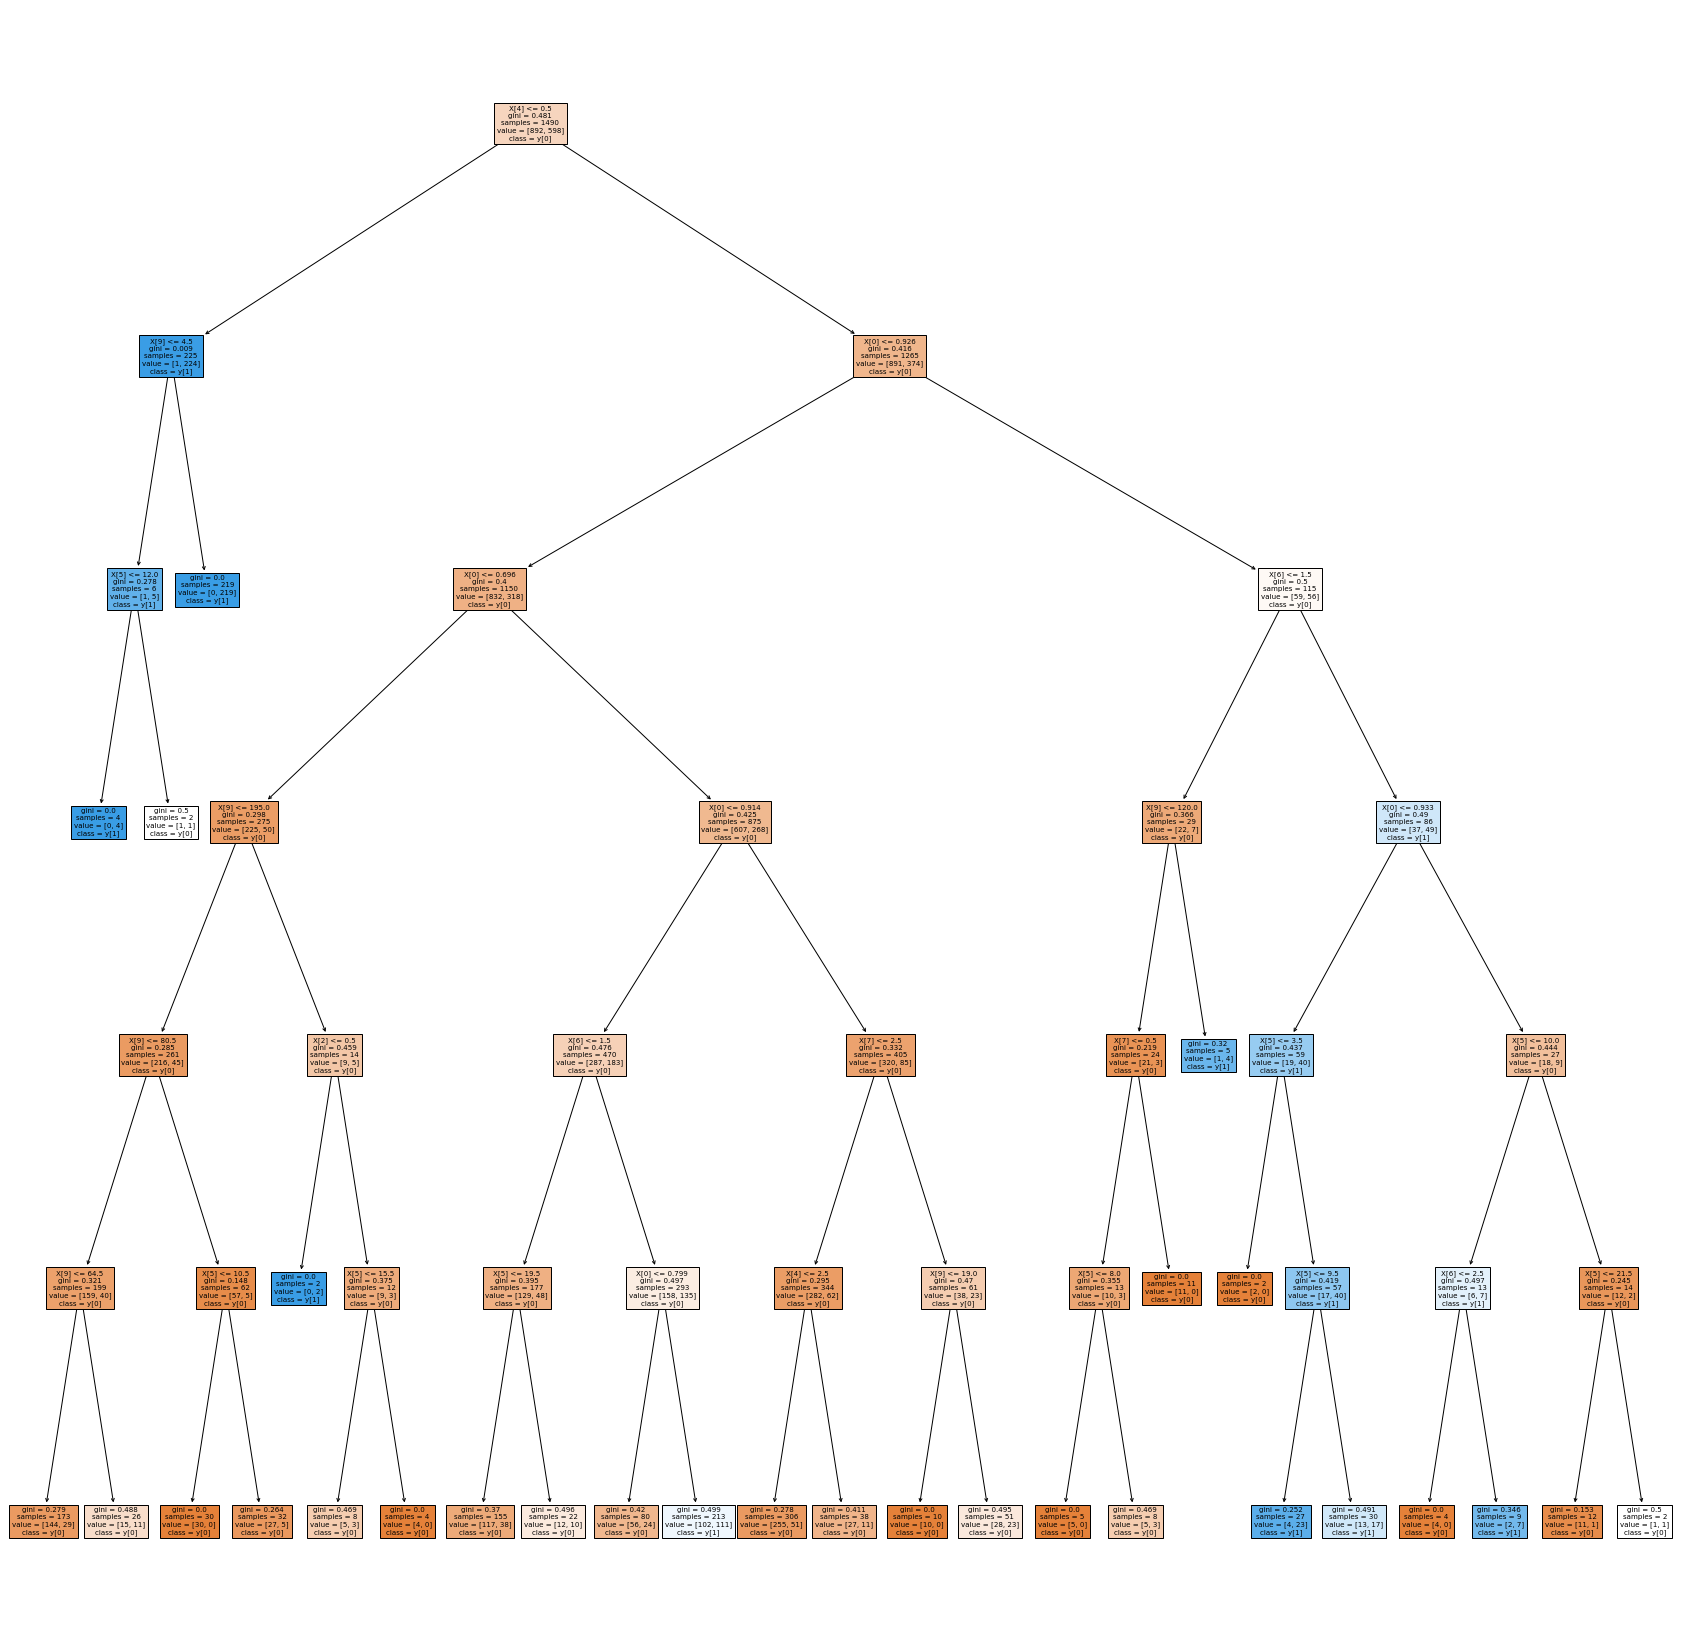

In [18]:
fig = plt.figure(figsize=(30,30))
_ = plot_tree(Tree, filled=True, class_names=True)

#Обученное дерево имеет высоту 2

#Сравним результаты работы метрик precision, recall и F1 на тестовой выборке:

F1 - лучше после подбора гиперпараметров

precision - лучше после подбора гиперпараметров

recall - лучше после подбора гиперпараметров

#Построим классификатор типа Случайный Лес (Random Forest) для решения той же задачи классификации.

In [19]:
from sklearn.ensemble import RandomForestClassifier 
param_grid = { 'n_estimators': [50, 100, 150],'max_features': ['auto'],'max_depth' : list(range(1, 10)), 'criterion' :['gini']}
RandForCrit = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid, cv = 5, refit = True) 
RandForCrit.fit(X_train, Y_train)
RandForCrit.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,

#Оценим его качество с помощью метрик precision, recall и F1 на тестовой выборке.

In [20]:
print("f1:"+str(numpy.average(cross_val_score(Tree, X_train, Y_train, scoring='f1'))))
print("precision:"+str(numpy.average(cross_val_score(Tree, X_train, Y_train, scoring='precision'))))
print("recall:"+str(numpy.average(cross_val_score(Tree, X_train, Y_train, scoring='recall'))))

f1:0.6365719969147079
precision:0.751179126823143
recall:0.5602380952380952


In [21]:
print("f1:"+str(numpy.average(cross_val_score(Tree, X_test, Y_test, scoring='f1'))))
print("precision:"+str(numpy.average(cross_val_score(Tree, X_test, Y_test, scoring='precision'))))
print("recall:"+str(numpy.average(cross_val_score(Tree, X_test, Y_test, scoring='recall'))))

f1:0.5330201723159469
precision:0.8270199805068227
recall:0.3969521044992743


#Найдём количество деревьев, из которых состоит полученный Случайный Лес (Random Forest)

In [22]:
RFC = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 5, refit = True) 
RFC.fit(X_train, Y_train)
len(RFC.best_estimator_.estimators_)

150

#Сравним результаты:

F1 - лучше у классификатора Случайный Лес (Random Forest)

precision - лучше у классификатора Случайный Лес (Random Forest)

recall - лучше у классификатора Случайный Лес (Random Forest)


